# LUCID-GAN

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from canonical_sets import LUCIDGAN
from canonical_sets.data import Adult
from canonical_sets.models import ClassifierTF

In [2]:
# Potential Direct Discrimination (protected attributes included)
tf.keras.utils.set_random_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

adult = Adult()
dir_adult_model = ClassifierTF(2)
dir_adult_model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])
dir_adult_model.fit(adult.train_data.to_numpy(), adult.train_labels.to_numpy(), epochs=200,
 validation_data=(adult.val_data.to_numpy(), adult.val_labels.to_numpy()),
 callbacks=[callback], verbose=0)
print(f"Test accuracy: {dir_adult_model.evaluate(adult.test_data.to_numpy(), adult.test_labels.to_numpy())[1]}")

471/471 [==============================] - 1s 1ms/step - loss: 0.3442 - accuracy: 0.8386
Test accuracy: 0.838578999042511


471/471 [==============================] - 1s 885us/step


Epoch 4, Loss G: -0.9030, Loss R:  2.2036, Loss D:  0.1663: 100%|██████████| 5/5 [00:12<00:00,  2.54s/it]


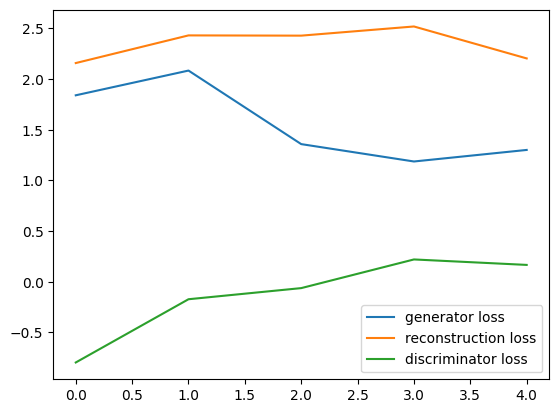

In [3]:
# LUCID-GAN
adult_preds = dir_adult_model.predict(adult.test_data.to_numpy())[:, 1]
adult_test_data = adult.inverse_preprocess(adult.test_data)
adult_data = pd.concat([adult_test_data, pd.DataFrame(adult_preds, columns=["preds"])], axis=1)

dir_adult_lucidgan = LUCIDGAN(epochs=5)

dir_adult_lucidgan.set_random_state(42)
dir_adult_lucidgan.fit(adult_data, conditional=["preds"])

dir_adult_pos_samples = dir_adult_lucidgan.sample(1000, conditional=pd.DataFrame({"preds": [1]}))
dir_adult_neg_samples = dir_adult_lucidgan.sample(1000, conditional=pd.DataFrame({"preds": [0]}))

plt.plot(dir_adult_lucidgan.generator_loss, label = "generator loss")
plt.plot(dir_adult_lucidgan.reconstruction_loss, label = "reconstruction loss")
plt.plot(dir_adult_lucidgan.discriminator_loss, label = "discriminator loss")
plt.legend()
plt.show()

For more information on LUCID-GAN, check the notebooks in the examples folder on GitHub. There is also the replication of the LUCID-GAN paper's results.